# Pandas DataFrames

Pandas DataFrames are mutable two-dimensional structures of data with labeled axes where: 
* each row represents a different observation
* each column represents a different variable

As always, we first need to import the Pandas module:

In [ ]:
import pandas as pd

Next, if we want a DataFrame with 5 rows and 2 columns, we can do it from a [dictionary](https://www.w3schools.com/python/python_dictionaries.asp), a [list](https://www.w3schools.com/python/python_lists.asp) of lists, a list of dictionaries, etc.

We are going to create a 5 row, 2 column DataFrame from a dictionary. To do this, we will follow these steps:

1. Create a dictionary where the keys will be the names of the columns and the values will be lists, with as many elements as the number of rows we want.
2. Convert that dictionary to dataframe with pandas' `pd.DataFrame()` function.

In [ ]:
# 1. Create the dictionary
data = {
    "x":[1, 2, 3, 4, 5], 
    "y":[6, 7, 8, 9, 10]
}

In [ ]:
data['x']

[1, 2, 3, 4, 5]

In [ ]:
# 2. Convert dictionary to dataframe
df = pd.DataFrame(data)
print(df)
# df

   x   y
0  1   6
1  2   7
2  3   8
3  4   9
4  5  10


As we said, we have created a dataframe with 5 rows and two columns, called x and y respectively.

**Observation**: As a result of `print()`, we have not only obtained the 5 rows and 2 columns, but there is an additional "column" of 5 numbers ordered vertically from 0 to 4. This column is called the **index** and it is simply the name of each row, which by default is their ordinal position: 0 indicates the first row; the 1, the second; and so on.

## Import a csv file to dataframe

Most of the time, you will not be creating dataframes yourself, but importing (or "reading") data from a csv file or a database into a pandas dataframe. It's easy to do with pandas' read functions:

In [ ]:
url = 'https://drive.google.com/file/d/1FYhN_2AzTBFuWcfHaRuKcuCE6CWXsWtG/view?usp=sharing' # orderlines.csv
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

## Dataframe dimensions

With the `.shape` attribute we can calculate the dimensions (number of rows and columns) of the dataframe.

In [ ]:
df.shape

(293983, 7)

As a result we obtain a [tuple](https://www.w3schools.com/python/python_tuples.asp) where the first element is the number of rows, which in our case is 293983, while the second element is the number of columns, which in our example was 7.

In [ ]:
nrows = df.shape[0]
ncols = df.shape[1]
print("The number of rows is", nrows)
print("The number of columns is", ncols)

The number of rows is 293983
The number of columns is 7


`DataFrame.size` returns the total number of values that the dataframe has (the number of rows multiplied by the number of columns):

In [ ]:
df.size

2057881

In [ ]:
# check if that's true
df.shape[0] * df.shape[1] == df.size

True

With the `.ndim` attribute we calculate the number of dimensions that the dataframe has. This will always be 2, as it consists of rows and columns.

In [ ]:
df.ndim

2

## Dataframes exploration

The `DataFrame.head()` and `DataFrame.tail()` methods are used to display the first or last rows of the dataframe. Looking at the raw data is a great way to get a grasp of what's in there. By default, 5 rows will be shown, but you can change that:

In [ ]:
df.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38


In [ ]:
df.head(9)

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
5,1119114,295310,0,10,WDT0249,231.79,2017-01-01 01:14:27
6,1119115,299544,0,1,APP1582,1.137.99,2017-01-01 01:17:21
7,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16
8,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34


In [ ]:
df.tail()

,id,id_order,product_id,product_quantity,sku,unit_price,date
293978,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25
293979,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34
293980,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41
293981,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01
293982,1650203,527401,0,1,APP0927,13.99,2018-03-14 13:58:36


The methods `DataFrame.info()`, `DataFrame.describe()` and `DataFrame.nunique()` give a general overview of what's in the dataframe:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
dtypes: int64(4), object(3)
memory usage: 15.7+ MB


In [ ]:
df.describe()

,id,id_order,product_id,product_quantity
count,2.939830e+05,293983.000000,293983.0,293983.000000
mean,1.397918e+06,419999.116544,0.0,1.121126
std,1.530096e+05,66344.486479,0.0,3.396569
min,1.119109e+06,241319.000000,0.0,1.000000
25%,1.262542e+06,362258.500000,0.0,1.000000
50%,1.406940e+06,425956.000000,0.0,1.000000
75%,1.531322e+06,478657.000000,0.0,1.000000
max,1.650203e+06,527401.000000,0.0,999.000000


In [ ]:
df.nunique()

id                  293983
id_order            204855
product_id               1
product_quantity        67
sku                   7951
unit_price           11329
date                251631
dtype: int64

The `.unique()` method returns the unique values from a column as a numpy array, which can be indexed with `[]`:

In [ ]:
df['sku'].unique()[:10]

array(['OTT0133', 'LGE0043', 'PAR0071', 'WDT0315', 'JBL0104', 'WDT0249',
       'APP1582', 'OWC0100', 'IOT0014', 'APP0700'], dtype=object)

The `isna()` method returns a boolean for each value: `True` if that value is "missing" (which is represented as `NaN` in numpy and pandas) and `False` if the value is not missing:

In [ ]:
df.isna()

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
293978,False,False,False,False,False,False,False
293979,False,False,False,False,False,False,False
293980,False,False,False,False,False,False,False
293981,False,False,False,False,False,False,False


We can then use `DataFrame.sum()` to add up all these booleans for each column, and count how many missing values are there in the dataframe, since `True` is interpreted as `1` and `False` as `0`:

In [ ]:
df.isna().sum()

id                  0
id_order            0
product_id          0
product_quantity    0
sku                 0
unit_price          0
date                0
dtype: int64

`DataFrame.duplicated()` also returns a boolean output, but in this case just one value per row: `True` if that row is duplicated and `False` if it's not. Again, using `sum()` allows us to count how many `True` values (i.e. duplicated rows) are there in total:

In [ ]:
df.duplicated().sum() # parameters keep=False
# df.drop_duplicates()

0

`DataFrame.nlargest(n, columns)` will return the top `n` rows with the largest value for whatever column we specify in `columns`. Below, we see the rows with the largest product quantity values:

In [ ]:
df.nlargest(5, 'product_quantity')

,id,id_order,product_id,product_quantity,sku,unit_price,date
53860,1228150,346221,0,999,APP1190,55.99,2017-04-14 21:50:52
68712,1254032,358747,0,999,SEV0028,19.99,2017-05-24 14:51:58
57796,1234924,349475,0,800,KIN0137,7.49,2017-04-25 09:59:00
57306,1234111,349133,0,555,APP0665,70.99,2017-04-24 10:20:13
40813,1204788,335057,0,201,THU0029,80.99,2017-03-14 15:25:53


 `DataFrame.nsmallest()` does the same, for the smallest values:

In [ ]:
df.nsmallest(5, 'product_quantity')

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38


So far, we have seen two ways to explore DataFrames:

* `.shape`, `.size` and `.ndim`, among others, are **atributes**. They are written without parentheses and give you raw "metadata" about the DataFrame you are calling them on.
* `.head()`, `.describe()` and `.isna()`, among others, are **methods**. They are written with parentheses and perform some sort of calculation, transformation or aggregation. A method is like a function that is tied to a specific object type.

DataFrames have a lot of attributes and methods and may not be obvious whether something belongs to one type or the other. Whenever in doubt, check [the documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html?highlight=dataframe#pandas.DataFrame). If you scroll down past the list of examples you will find two sections listing all the attributes and methods.

## Columns

Given a DataFrame, we can select a particular column in several ways:

* Indicating the name of the column between square brackets, `[]`
* With the `.loc[]` attribute (by name or tag)
* With the `.iloc[]` attribute (by position)

Plain square brackets `[]` are used to just view a column if you know its name and **don't want to modify it**:

In [ ]:
# select the column by name
df['id_order']

0         299539
1         299540
2         299541
3         299542
4         299543
           ...  
293978    527398
293979    527399
293980    527400
293981    527388
293982    527401
Name: id_order, Length: 293983, dtype: int64

`.loc[]` takes two arguments: `[rows, columns]`. Passing `:` to the rows argument means "grabbing all the rows", which allows you to select a whole column if you know its name. This method is more flexible as you will see in the future, and allows you to modify the data.

In [ ]:
# method .loc[]
df.loc[:, 'id_order']

0         299539
1         299540
2         299541
3         299542
4         299543
           ...  
293978    527398
293979    527399
293980    527400
293981    527388
293982    527401
Name: id_order, Length: 293983, dtype: int64

`iloc[]` works similarly, but only accepts integers (which represent the positions of the rows and columns):

In [ ]:
# method .iloc[]
print(df.iloc[:, 0])

0         1119109
1         1119110
2         1119111
3         1119112
4         1119113
           ...   
293978    1650199
293979    1650200
293980    1650201
293981    1650202
293982    1650203
Name: id, Length: 293983, dtype: int64


### Select multiple columns

If we want to select more than one column, we can do it with all the options listed above, with slight modifications in some cases:

In [ ]:
# note that we pass a list inside of the []
df[['id_order','sku']]

,id_order,sku
0,299539,OTT0133
1,299540,LGE0043
2,299541,PAR0071
3,299542,WDT0315
4,299543,JBL0104
...,...,...
293978,527398,JBL0122
293979,527399,PAC0653
293980,527400,APP0698
293981,527388,BEZ0204


In [ ]:
# .loc()
df.loc[:, ["id_order", "sku"]]

,id_order,sku
0,299539,OTT0133
1,299540,LGE0043
2,299541,PAR0071
3,299542,WDT0315
4,299543,JBL0104
...,...,...
293978,527398,JBL0122
293979,527399,PAC0653
293980,527400,APP0698
293981,527388,BEZ0204


With `.loc[]` and `:` you can select all columns between two columns you specify.

In [ ]:
# .loc()
df.loc[:, "id_order":"sku"]

,id_order,product_id,product_quantity,sku
0,299539,0,1,OTT0133
1,299540,0,1,LGE0043
2,299541,0,1,PAR0071
3,299542,0,1,WDT0315
4,299543,0,1,JBL0104
...,...,...,...,...
293978,527398,0,1,JBL0122
293979,527399,0,1,PAC0653
293980,527400,0,2,APP0698
293981,527388,0,1,BEZ0204


In [ ]:
# .iloc
df.iloc[:, [0, 1]]

,id,id_order
0,1119109,299539
1,1119110,299540
2,1119111,299541
3,1119112,299542
4,1119113,299543
...,...,...
293978,1650199,527398
293979,1650200,527399
293980,1650201,527400
293981,1650202,527388


In [ ]:
df.iloc[:, 0:2]

,id,id_order
0,1119109,299539
1,1119110,299540
2,1119111,299541
3,1119112,299542
4,1119113,299543
...,...,...
293978,1650199,527398
293979,1650200,527399
293980,1650201,527400
293981,1650202,527388


## Rows

Selecting rows is easy if you know how to select columns. You have two options:

* With `.loc[]` (by name or tag)
* With `.iloc[]` (by position)

Selecting a single row returns a pandas Series (the 1-dimensional object that pandas has):

In [ ]:
df.loc[0]

id                              1119109
id_order                         299539
product_id                            0
product_quantity                      1
sku                             OTT0133
unit_price                        18.99
date                2017-01-01 00:07:19
Name: 0, dtype: object

With `.loc[]`, rows are selected by its index name:

In [ ]:
df.loc[0:3]

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40


If we change the index and set it to the `id` column, now the first rows can not be selected the same way:

In [ ]:
df.set_index('id', inplace=True)
# inplace = True is the same as doing df = df.set_index('id'), i.e. it modifies the dataframe

In [ ]:
df.loc[0:3]

,id_order,product_id,product_quantity,sku,unit_price,date
id,,,,,,


In [ ]:
df.head(2)

,id_order,product_id,product_quantity,sku,unit_price,date
id,,,,,,
1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45


In [ ]:
# select the first observation with the .loc() method
df.loc[1119110]

id_order                         299540
product_id                            0
product_quantity                      1
sku                             LGE0043
unit_price                       399.00
date                2017-01-01 00:19:45
Name: 1119110, dtype: object

With the `iloc[]` method we don't need to know the row names to select rows at a certain position:

In [ ]:
df.iloc[0:3]

,id_order,product_id,product_quantity,sku,unit_price,date
id,,,,,,
1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57


In [ ]:
# select the last observation with the method .iloc[]
df.iloc[-1]
# df.tail(1)

id_order                         527401
product_id                            0
product_quantity                      1
sku                             APP0927
unit_price                        13.99
date                2018-03-14 13:58:36
Name: 1650203, dtype: object

In [ ]:
df.loc[[1119111,1119112,1119113]]

,id_order,product_id,product_quantity,sku,unit_price,date
id,,,,,,
1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38


Again, using `:` you can select all elements between the two that you specified:

In [ ]:
df.loc[1119111:1119113]

,id_order,product_id,product_quantity,sku,unit_price,date
id,,,,,,
1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38


In [ ]:
df.reset_index(inplace=True)

Indexing can get tricky sometimes, it's ok to take some time to get used to the methods we presented, and it's ok to have some trouble selecting the rows and columns you need. For an exhaustive guide on Pandas indexing, check out this link: https://pandas.pydata.org/docs/user_guide/indexing.html#indexing 

## Drop and Filter data

The `.drop()` method allows us to delete the rows or columns that we indicate.

**Note:** Again, if we want to directly apply the changes to the original dataframe, we need to indicate `inplace = True`. Otherwise, we are getting as an output just a "view" of how the dataframe looks like after the drop, but the original dataframe remains untouched.

In [ ]:
# droping the column "unit_price"
# axis=1 means we want to drop a column, not a row (for rows, axis=0)
df.drop(['unit_price'], axis=1)

,id,id_order,product_id,product_quantity,sku,date
0,1119109,299539,0,1,OTT0133,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,2017-01-01 01:06:38
...,...,...,...,...,...,...
293978,1650199,527398,0,1,JBL0122,2018-03-14 13:57:25
293979,1650200,527399,0,1,PAC0653,2018-03-14 13:57:34
293980,1650201,527400,0,2,APP0698,2018-03-14 13:57:41
293981,1650202,527388,0,1,BEZ0204,2018-03-14 13:58:01


How to filter information on a dataframe.

In [ ]:
# rows with product quantity larger than 100
df.loc[df['product_quantity'] > 100, :]

,id,id_order,product_id,product_quantity,sku,unit_price,date
27779,1180010,323959,0,126,ADN0039,34.99,2017-02-14 10:21:12
40813,1204788,335057,0,201,THU0029,80.99,2017-03-14 15:25:53
53860,1228150,346221,0,999,APP1190,55.99,2017-04-14 21:50:52
57306,1234111,349133,0,555,APP0665,70.99,2017-04-24 10:20:13
57796,1234924,349475,0,800,KIN0137,7.49,2017-04-25 09:59:00
68712,1254032,358747,0,999,SEV0028,19.99,2017-05-24 14:51:58
136675,1388261,417536,0,200,TRK0009,29.99,2017-10-25 15:02:39
204637,1500715,464858,0,192,APP1662,519.00,2017-12-17 15:53:04
246048,1574262,496172,0,164,EVU0013,19.99,2018-01-22 16:14:42
285492,1637611,522075,0,125,XDO0047,25.99,2018-03-06 10:07:54


In [ ]:
df.id_order.mean()

419999.1165441539

The `.query()` method can be useful for this purpose, as it resembles SQL syntax. Note that it works only when the column values do not contain blank spaces. You can use any **Python Comparison Operators** you want inside the query method (find more information on this [link](https://www.w3schools.com/python/python_operators.asp)).

In [ ]:
df.query('product_quantity > 100')

,id,id_order,product_id,product_quantity,sku,unit_price,date
27779,1180010,323959,0,126,ADN0039,34.99,2017-02-14 10:21:12
40813,1204788,335057,0,201,THU0029,80.99,2017-03-14 15:25:53
53860,1228150,346221,0,999,APP1190,55.99,2017-04-14 21:50:52
57306,1234111,349133,0,555,APP0665,70.99,2017-04-24 10:20:13
57796,1234924,349475,0,800,KIN0137,7.49,2017-04-25 09:59:00
68712,1254032,358747,0,999,SEV0028,19.99,2017-05-24 14:51:58
136675,1388261,417536,0,200,TRK0009,29.99,2017-10-25 15:02:39
204637,1500715,464858,0,192,APP1662,519.00,2017-12-17 15:53:04
246048,1574262,496172,0,164,EVU0013,19.99,2018-01-22 16:14:42
285492,1637611,522075,0,125,XDO0047,25.99,2018-03-06 10:07:54


The `isin()` method is very useful to find rows that match any of the values you have in a list. For example, here we are searching for rows where its `sku` matches any of the 2 sku's we listed:

In [ ]:
# find out a column that contains a list
df['sku'].isin(['JBL0104', 'ADN0039'])

0         False
1         False
2         False
3         False
4          True
          ...  
293978    False
293979    False
293980    False
293981    False
293982    False
Name: sku, Length: 293983, dtype: bool

This expression can be used inside of `[]` or `.loc[]` to filter the rows that have a `True` value. This is called "boolean indexing" and it is really useful:

In [ ]:
my_products = df['sku'].isin(['JBL0104', 'ADN0039'])

df.loc[my_products, :]

,id,id_order,product_id,product_quantity,sku,unit_price,date
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
716,1120463,300212,0,2,JBL0104,26.99,2017-01-02 01:44:05
774,1120607,300272,0,1,JBL0104,24.99,2017-01-02 08:57:07
866,1120758,300349,0,1,JBL0104,24.99,2017-01-02 10:41:29
1411,1122014,300851,0,1,JBL0104,24.99,2017-01-02 18:50:13
...,...,...,...,...,...,...,...
258180,1593360,503247,0,1,JBL0104,23.99,2018-01-31 20:55:50
263790,1601885,506553,0,1,JBL0104,24.99,2018-02-05 22:41:40
266635,1606326,508345,0,2,JBL0104,24.99,2018-02-08 19:20:21
268446,1608949,509377,0,1,JBL0104,24.99,2018-02-10 18:02:37


Pandas compresses large outputs in Colab/Jupyter Notebooks. If you want to see more rows, you can change the options:

In [ ]:
pd.options.display.max_rows = 100
# after running this cell, run the code above again and you will see all the rows.

For a complete list of all settings and options that can be tweaked, check out this: https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

#### Modifying a dataframe & the `.copy()` method

Let's take a small chunk of data from our dataframe:

In [ ]:
sample = df.iloc[:3,:]
sample

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57


Now we pick a single cell from the sample we took and we assign a new value to it. A warning already tells us that this is a risky thing to do:

In [ ]:
# we change the "unit_price" of the first row:
sample.iloc[0,4] = 'NEW VALUE HERE'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


We can see the new value on the `sample` we took:

In [ ]:
sample

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,NEW VALUE HERE,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57


..and, maybe to your surprise, we can see that the new value is also present on the original `df`!

In [ ]:
df.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,NEW VALUE HERE,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38


When you take a chunk of data using `.loc[]` or `iloc[]` and assign it to a new object, the new object is just a "tag" pointing to the very same data as the original dataframe points to. We can avoid this using the method `.copy()`

In [ ]:
url = 'https://drive.google.com/file/d/14Y7g5ITyf6LMyPoKc9wr010V9StaCUux/view?usp=sharing' # orderlines.csv
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

sample = df.iloc[:3,:].copy()
sample.iloc[0,4] = 'NEW VALUE HERE'
sample

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,NEW VALUE HERE,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57


In [ ]:
df.head(3)

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57


As you can see, now it has not been modified.

# CHALLENGES

1. How many different unit prices does the product with the sku JBL0104 have? Combine a pandas filter method with the method `.nunique()`.

In [ ]:
# code here
df.loc[df.sku == 'JBL0104'].nunique()[5]

7

In [ ]:
df.loc[df.sku == 'JBL0104'].nunique()['unit_price']

7

In [ ]:
df.loc[df.sku == 'JBL0104'].nunique().unit_price

7

In [ ]:
df['unit_price'].loc[df['sku'] == 'JBL0104'].nunique()

7

In [ ]:
df.unit_price.loc[df.sku == 'JBL0104'].nunique()

7

2. List the (unique) items that were sold in the order with the id_order 385921.

In [ ]:
# code here
df.loc[df['id_order'] == 385921].nunique().sku

19

In [ ]:
df.loc[df['id_order'] == 385921].nunique()['sku']

19

In [ ]:
df['sku'].loc[df['id_order'] == 385921].nunique()

19

In [ ]:
df.loc[df.id_order == 385921, 'sku'].nunique()

19

3. Consider the products with the sku's APP2431 and APP2348. Find out in how many orders were they present.

In [ ]:
# code here
df.sku.loc[df.sku.isin(['APP2431', 'APP2348'])].value_counts()

APP2348    119
APP2431     70
Name: sku, dtype: int64

In [ ]:
df.id_order.loc[df.sku.isin(['APP2431', 'APP2348'])].nunique()

179

In [ ]:
df.loc[df.sku.isin(['APP2431', 'APP2348']), 'sku'].value_counts()

APP2348    119
APP2431     70
Name: sku, dtype: int64

In [ ]:
df.loc[df.sku == 'APP2431'].nunique().id_order, df.loc[df.sku == 'APP2348'].nunique().id_order

(70, 119)

4. Create a new dataframe, `df_50`, with all the rows that have a product quantity higher than 500 and only the columns `id`, id `order`, `product_quantity` and `sku`. Be sure to use the method `.copy()`. Once the new dataframe is created, modify the column 'product_quantity' to 'quantity', and 'sku' to 'product_code'. To do so, you can use the method `.rename()` or assign a list of new names to the attribute `.columns`.

In [ ]:
df.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38


In [ ]:
# code here
df_50 = df[['id', 'id_order', 'product_quantity', 'sku']].loc[df.product_quantity > 500].copy()
df_50

,id,id_order,product_quantity,sku
53860,1228150,346221,999,APP1190
57306,1234111,349133,555,APP0665
57796,1234924,349475,800,KIN0137
68712,1254032,358747,999,SEV0028


In [ ]:
df_50.rename(columns = {'product_quantity':'quantity', 'sku':'product_code'}, inplace = True)
df_50

,id,id_order,quantity,product_code
53860,1228150,346221,999,APP1190
57306,1234111,349133,555,APP0665
57796,1234924,349475,800,KIN0137
68712,1254032,358747,999,SEV0028


5. Filter all the order lines where the product with the sku XDO0047 has appeared. Sort the rows by their product quantity using the [`.sort_values()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) method from pandas, in a DESCENDING order. Then look at the main descriptive information of this results with the method `.describe()`.

In [ ]:
# code here
df.loc[df.sku == 'XDO0047'].sort_values('product_quantity', ascending=False)

,id,id_order,product_id,product_quantity,sku,unit_price,date
285492,1637611,522075,0,125,XDO0047,25.99,2018-03-06 10:07:54
203932,1499415,464239,0,2,XDO0047,25.99,2017-12-16 09:36:51
124018,1365515,406387,0,1,XDO0047,23.39,2017-09-29 17:09:32
238277,1561096,491065,0,1,XDO0047,25.99,2018-01-15 09:39:07
186320,1474709,454473,0,1,XDO0047,25.99,2017-12-03 17:05:14
197678,1489835,460182,0,1,XDO0047,25.99,2017-12-11 20:28:12
216416,1523205,475450,0,1,XDO0047,25.99,2017-12-28 20:44:19
217466,1525182,476341,0,1,XDO0047,22.09,2017-12-29 15:39:11
217957,1526191,476848,0,1,XDO0047,22.09,2017-12-29 21:32:50
246332,1574873,496429,0,1,XDO0047,25.99,2018-01-22 23:03:34


In [ ]:
df.loc[df.sku == 'XDO0047'].describe()

,id,id_order,product_id,product_quantity
count,3.600000e+01,36.000000,36.0,36.000000
mean,1.485767e+06,458640.277778,0.0,4.472222
std,8.770532e+04,36891.598431,0.0,20.662576
min,1.365515e+06,406387.000000,0.0,1.000000
25%,1.405830e+06,425462.750000,0.0,1.000000
50%,1.471428e+06,453247.000000,0.0,1.000000
75%,1.564540e+06,492406.000000,0.0,1.000000
max,1.640821e+06,523533.000000,0.0,125.000000


# Explore the other dataframes orders, brands, products

In [ ]:
import pandas as pd


# orders.csv
url = 'https://drive.google.com/file/d/1BLEHcP-9fm9Rv7A01H3co2XBMnSr66YC/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orders = pd.read_csv(path)

# brands.csv
url = 'https://drive.google.com/file/d/1BrNrIY0F1LbyXtyaQygUBXVxQGB3JBqx/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
brands = pd.read_csv(path)

# products.csv
url = 'https://drive.google.com/file/d/1UfsHI80cpQqGfsH2g4T4Tsw8cWayOfzC/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
products = pd.read_csv(path)

## Data Exploration General Codes

In [ ]:
# DataFrame.info() 
# DataFrame.describe()
# DataFrame.head(), DataFrame.tails()
# DataFrame.shape
# DataFrame.columns 
# DataFrame.isna().any()
# DataFrame.isna().sum()
# DataFrame.ColumnName.isna()
# DataFrame.nunique()
# DataFrame.ColumnName.value_counts()
# DataFrame.hist() 
# DataFrame.duplicated().sum()
# DataFrame.drop_duplicates()


## Orders Data Exploration

Every row in 'orders.csv' file represents an order.

> 'order_id' is a unique identifier for each order.

> 'created_date' is a timestamp for when the order was created.

> 'total_paid' is the total amount paid by the customer for the corresponding order, in euros.

> 'state':

*   “Shopping basket” – products have been placed to the shopping basket, but the order has not been processed yet.

*   “Pending” – the shopping basket has been processed, but payment confirmation is pending.

*   “Completed” – the order has been placed and payed, the transaction is completed.

*   “Cancelled” – the order has been cancelled and the payment returned to the customer.

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226909 non-null  int64  
 1   created_date  226909 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


In [ ]:
orders.describe()

,order_id,total_paid
count,226909.000000,226904.000000
mean,413296.482480,569.225818
std,65919.250331,1761.778002
min,241319.000000,0.000000
25%,356263.000000,34.190000
50%,413040.000000,112.990000
75%,470553.000000,525.980000
max,527401.000000,214747.530000


In [ ]:
orders.head()

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled


In [ ]:
orders.tail()

,order_id,created_date,total_paid,state
226904,527397,2018-03-14 13:56:38,42.99,Place Order
226905,527398,2018-03-14 13:57:25,42.99,Shopping Basket
226906,527399,2018-03-14 13:57:34,141.58,Shopping Basket
226907,527400,2018-03-14 13:57:41,19.98,Shopping Basket
226908,527401,2018-03-14 13:58:36,18.98,Place Order


In [ ]:
orders.isna().any() 

order_id        False
created_date    False
total_paid       True
state           False
dtype: bool

In [ ]:
orders.isna().sum()

order_id        0
created_date    0
total_paid      5
state           0
dtype: int64

In [ ]:
orders.loc[orders.isna().total_paid]

,order_id,created_date,total_paid,state
127701,427314,2017-11-20 18:54:39,NaN,Pending
132013,431655,2017-11-22 12:15:24,NaN,Pending
147316,447411,2017-11-27 10:32:37,NaN,Pending
148833,448966,2017-11-27 18:54:15,NaN,Pending
149434,449596,2017-11-27 21:52:08,NaN,Pending


In [ ]:
orders.loc[orders.state == 'Pending']

,order_id,created_date,total_paid,state
7,245851,2017-04-04 20:58:21,79.99,Pending
17,252371,2017-02-09 12:31:57,27.98,Pending
24,254537,2017-05-23 19:58:30,102.97,Pending
27,256434,2018-02-26 07:32:21,39.99,Pending
32,258087,2017-02-28 19:15:24,84.73,Pending
...,...,...,...,...
226877,527370,2018-03-14 13:47:00,19.98,Pending
226880,527373,2018-03-14 13:44:45,31.38,Pending
226886,527379,2018-03-14 13:50:49,9.99,Pending
226898,527391,2018-03-14 13:57:54,54.98,Pending


In [ ]:
orders.columns

Index(['order_id', 'created_date', 'total_paid', 'state'], dtype='object')

In [ ]:
orders.nunique()

order_id        226909
created_date    224828
total_paid       31236
state                5
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0e3804d90>,
      dtype=object)

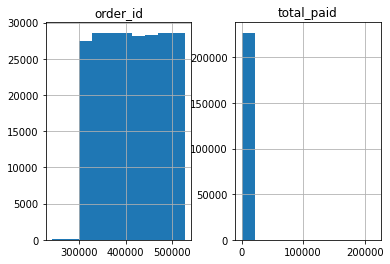

In [ ]:
orders.hist()

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226909 non-null  int64  
 1   created_date  226909 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


### Conclusion
There are 5 missing data in the 'total_paid' column and share the same state value (Pending). \
The variable 'state' seems to be categorical. \
The variable 'total_paid' has outliers.


## Brands Data Exploration

Every row in the 'brands.csv' file represents a brand.

> 'short' represents the 3 character code by which the brand can be identified in the first 3 characters of products.sku.

> 'long' represents the brand name.





In [ ]:
brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


In [ ]:
brands.describe()

,short,long
count,187,187
unique,187,181
top,8MO,Mophie
freq,1,2


It seems that the variable 'long' has some duplicates.

In [ ]:
brands.loc[brands.long.duplicated()].long

7         Apple
19         Bose
70      Jaybird
80      Unknown
98       Mophie
153    Startech
Name: long, dtype: object

These are the brands whose names are duplicated.

In [ ]:
brands.loc[brands.long.isin(brands.loc[brands.long.duplicated()].long)]

,short,long
6,AP2,Apple
7,APP,Apple
17,BOS,Bose
19,CAD,Bose
37,ENV,Unknown
67,JYB,Jaybird
70,KEN,Jaybird
80,LIB,Unknown
94,MOP,Mophie
98,MUJ,Mophie


These brands each have two short names. \
A brand's short name should be composed of the first three letters in the brand's long name.

In [ ]:
brands.loc[brands.short.isin(brands.loc[brands.long.isin(brands.loc[brands.long.duplicated()].long)].short)]

,short,long
6,AP2,Apple
7,APP,Apple
17,BOS,Bose
19,CAD,Bose
37,ENV,Unknown
67,JYB,Jaybird
70,KEN,Jaybird
80,LIB,Unknown
94,MOP,Mophie
98,MUJ,Mophie


There is no short name shared by two brands or more.

In [ ]:
brands.head()

,short,long
0,8MO,8Mobility
1,ACM,Acme
2,ADN,Adonit
3,AII,Aiino
4,AKI,Akitio


In [ ]:
brands.tail()

,short,long
182,XOO,Xoopar
183,XRI,X-Rite
184,XTO,Xtorm
185,ZAG,ZaggKeys
186,ZEP,Zepp


In [ ]:
brands.isna().any()

short    False
long     False
dtype: bool

### Conclusion
6 brands have each two short names. Only one must be chosen. \
We should check which of the two short names, of each brand, is used in the 'products.csv' file.

## Products Data Exploration

In [ ]:
products.loc[products.sku.str.contains('AP2')]

,sku,name,desc,price,promo_price,in_stock,type
1415,AP20102,Second hand - Apple iPad Smart Cover Case Air ...,Leather Case for iPad Air used (like new),45,249.901,0,12635403
10723,AP20104,Second hand - Apple iPad Case Silicone Case Mi...,used protective case ultrafine silicone cases ...,69,349.896,0,12635403
10724,AP20105,Like new - Apple iPad Case Silicone Case Mini ...,used protective case ultrafine silicone cases ...,69,349.896,0,12635403
10739,AP20147,Like new - Apple TV 32GB media player,Refurbished Apple multimedia player,179,1.439.997,0,4259
11970,AP20111,"Like new - Apple iPad Smart Cover Pro 97 ""Midn...",Second hand Case iPad Pro 97-inch,79,399.905,0,12635403
...,...,...,...,...,...,...,...
19285,AP20470,Like new - Apple Thunderbolt to Gigabit Ethern...,Refurbished Mac adapter Thunderbolt to Gigabit...,35,279.994,0,1325
19288,AP20649,Like new - Apple Leather Case iPhone Case 8/7 ...,Reconditioned sleeve leather and microfiber Ap...,55,420.003,0,11865403
19290,AP20474,Like new - Apple Watch GPS 38mm Case Series 3 ...,Reconditioned Apple Watch 38mm series 3 with G...,369,3.189.996,0,24885185
19295,AP20471,Apple Thunderbolt to FireWire 800 adapter,Reconditioned connection adapter Thunderbolt t...,35,279.994,0,1325


In [ ]:
products.nunique()

sku            10579
name           10373
desc            7098
price           2690
promo_price     4614
in_stock           2
type             126
dtype: int64

In [ ]:
products.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


In [ ]:
products.describe()

,in_stock
count,19326.000000
mean,0.109593
std,0.312390
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
products.head()

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364


In [ ]:
products.tail()

,sku,name,desc,price,promo_price,in_stock,type
19321,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,269.903,1,12282
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,649.903,0,1392
19325,THU0063,"Enroute Thule 14L Backpack MacBook 13 ""Green",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392


In [ ]:
products.nunique()

sku            10579
name           10373
desc            7098
price           2690
promo_price     4614
in_stock           2
type             126
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0e31d3d10>]],
      dtype=object)

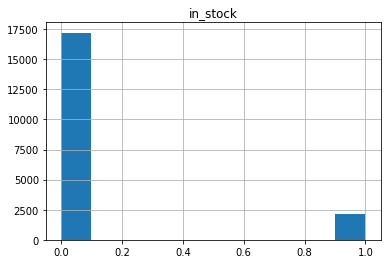

In [ ]:
products.hist()

In [ ]:
products.sku.value_counts()

PAC1035    58
PAC1036    58
PAC1034    58
PAC1033    58
PAC1032    58
           ..
PAC1280     1
PAC1277     1
PAC1275     1
PAC1273     1
THU0063     1
Name: sku, Length: 10579, dtype: int64

In [ ]:
products.duplicated().sum()

8746

In [ ]:
products.loc[products.duplicated()]

,sku,name,desc,price,promo_price,in_stock,type
101,APP0390,"Apple MacBook Pro 133 ""Core i5 25GHz | 4GB RAM...",MacBook Pro laptop 133 inches (MD101Y / A).,1199,11.455.917,0,1282
102,APP0390,"Apple MacBook Pro 133 ""Core i5 25GHz | 4GB RAM...",MacBook Pro laptop 133 inches (MD101Y / A).,1199,11.455.917,0,1282
103,APP0390,"Apple MacBook Pro 133 ""Core i5 25GHz | 4GB RAM...",MacBook Pro laptop 133 inches (MD101Y / A).,1199,11.455.917,0,1282
104,APP0390,"Apple MacBook Pro 133 ""Core i5 25GHz | 4GB RAM...",MacBook Pro laptop 133 inches (MD101Y / A).,1199,11.455.917,0,1282
105,APP0390,"Apple MacBook Pro 133 ""Core i5 25GHz | 4GB RAM...",MacBook Pro laptop 133 inches (MD101Y / A).,1199,11.455.917,0,1282
...,...,...,...,...,...,...,...
16831,APP2302,"Apple MacBook Pro 13 ""Core i5 Touch Bar 33GHz ...",New MacBook Pro 13-inch Core i5 Touch Bar 33 G...,26.155.941,26.155.941,0,"1,02E+12"
16833,APP2303,"Apple MacBook Pro 13 ""Core i5 Touch Bar 33GHz ...",New MacBook Pro 13 inch Touch Bar 33 GHz Core ...,237.559.421,23.755.942,0,"1,02E+12"
18190,PAR0077,Parrot Bebop Drone 2 Power,Drone cuadricóptero quality camera integrated ...,699.9,6.733.892,0,11905404
18308,NKI0010,Nokia Wireless sphygmomanometer Plata,Sphygmomanometer for iPhone iPad and iPod App.,129.99,1.149.899,1,11905404


In [ ]:
len(products)

19326

In [ ]:
# DataFrame.info() 
# DataFrame.describe()
# DataFrame.head(), DataFrame.tails()
# DataFrame.shape
# DataFrame.columns 
# DataFrame.isna().any()
# DataFrame.isna().sum()
# DataFrame.ColumnName.isna()
# DataFrame.nunique()
# DataFrame.ColumnName.value_counts()
# DataFrame.hist() 
# DataFrame.duplicated().sum()
# DataFrame.drop_duplicates()

In [ ]:
orders

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled
...,...,...,...,...
226904,527397,2018-03-14 13:56:38,42.99,Place Order
226905,527398,2018-03-14 13:57:25,42.99,Shopping Basket
226906,527399,2018-03-14 13:57:34,141.58,Shopping Basket
226907,527400,2018-03-14 13:57:41,19.98,Shopping Basket


In [ ]:
df

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
...,...,...,...,...,...,...,...
293978,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25
293979,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34
293980,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41
293981,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01


# End